<a href="https://colab.research.google.com/github/krish61/WhatsAPP-GroupChat-Analysis/blob/main/WhatsAppAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
data = pd.read_csv('Samaaj.txt', delimiter = "\t", header = None, names = ['text'])

In [107]:
data

,text
0,"24/03/2021, 9:34 pm - Messages and calls are e..."
1,"24/03/2021, 9:34 pm - You created group ""Samaj..."
2,"24/03/2021, 9:35 pm - Gaurav Root: Chutiya pur..."
3,"24/03/2021, 9:35 pm - Bharat Root changed the ..."
4,"24/03/2021, 9:35 pm - Bharat Root changed the ..."
...,...
251,"26/03/2021, 10:22 pm - Bharat Root: Haan"
252,"26/03/2021, 10:22 pm - Bharat Root: Le aa abhi..."
253,"26/03/2021, 10:22 pm - Bharat Root: Mai bhi ab..."
254,"27/03/2021, 12:21 am - Bharat Root: Ab toh mer..."


In [108]:
# Extract datetime
data[['datetime_str','text_2']] = data["text"].str.split(" - ", 1, expand=True)
data["datetime"] = pd.to_datetime(data["datetime_str"], format="%d/%m/%Y, %I:%M %p", errors='coerce')
data = data.dropna(subset=['datetime'])
data = data.drop(columns = ['datetime_str'])

In [109]:
data

,text,text_2,datetime
0,"24/03/2021, 9:34 pm - Messages and calls are e...",Messages and calls are end-to-end encrypted. N...,2021-03-24 21:34:00
1,"24/03/2021, 9:34 pm - You created group ""Samaj...","You created group ""Samaj Bakchod Hai""",2021-03-24 21:34:00
2,"24/03/2021, 9:35 pm - Gaurav Root: Chutiya pur...",Gaurav Root: Chutiya purane vle me hvadd krlet...,2021-03-24 21:35:00
3,"24/03/2021, 9:35 pm - Bharat Root changed the ...","Bharat Root changed the subject from ""Samaj Ba...",2021-03-24 21:35:00
4,"24/03/2021, 9:35 pm - Bharat Root changed the ...","Bharat Root changed the subject from ""#Samaj-B...",2021-03-24 21:35:00
...,...,...,...
251,"26/03/2021, 10:22 pm - Bharat Root: Haan",Bharat Root: Haan,2021-03-26 22:22:00
252,"26/03/2021, 10:22 pm - Bharat Root: Le aa abhi...",Bharat Root: Le aa abhi toh khula hoga shop,2021-03-26 22:22:00
253,"26/03/2021, 10:22 pm - Bharat Root: Mai bhi ab...",Bharat Root: Mai bhi abhi laya hu,2021-03-26 22:22:00
254,"27/03/2021, 12:21 am - Bharat Root: Ab toh mer...",Bharat Root: Ab toh mereko bhi doubt hone lga,2021-03-27 00:21:00


In [110]:
data['text_2'].str.split(': ', 1, expand=True)

,0,1
0,Messages and calls are end-to-end encrypted. N...,None
1,"You created group ""Samaj Bakchod Hai""",None
2,Gaurav Root,Chutiya purane vle me hvadd krleta ek or nya k...
3,"Bharat Root changed the subject from ""Samaj Ba...",None
4,"Bharat Root changed the subject from ""#Samaj-B...",None
...,...,...
251,Bharat Root,Haan
252,Bharat Root,Le aa abhi toh khula hoga shop
253,Bharat Root,Mai bhi abhi laya hu
254,Bharat Root,Ab toh mereko bhi doubt hone lga


In [111]:
# Extract sender and message
data[['sender','text_message']] = data['text_2'].str.split(': ', 1, expand=True)
data = data.dropna(subset=['text_message'])
data = data.drop(columns = ['text','text_2'])

In [112]:
data

,datetime,sender,text_message
2,2021-03-24 21:35:00,Gaurav Root,Chutiya purane vle me hvadd krleta ek or nya k...
6,2021-03-24 21:36:00,Bharat Root,Gaurav bhai
7,2021-03-24 21:36:00,Bharat Root,😂
8,2021-03-24 21:36:00,Bharat Root,kisse mangra hai
9,2021-03-24 21:36:00,Gaurav Root,Ye ase h randhir kbydd arri th
...,...,...,...
251,2021-03-26 22:22:00,Bharat Root,Haan
252,2021-03-26 22:22:00,Bharat Root,Le aa abhi toh khula hoga shop
253,2021-03-26 22:22:00,Bharat Root,Mai bhi abhi laya hu
254,2021-03-27 00:21:00,Bharat Root,Ab toh mereko bhi doubt hone lga


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 2 to 255
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      247 non-null    datetime64[ns]
 1   sender        247 non-null    object        
 2   text_message  247 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.7+ KB


In [114]:
data.head(20)

,datetime,sender,text_message
2,2021-03-24 21:35:00,Gaurav Root,Chutiya purane vle me hvadd krleta ek or nya k...
6,2021-03-24 21:36:00,Bharat Root,Gaurav bhai
7,2021-03-24 21:36:00,Bharat Root,😂
8,2021-03-24 21:36:00,Bharat Root,kisse mangra hai
9,2021-03-24 21:36:00,Gaurav Root,Ye ase h randhir kbydd arri th
10,2021-03-24 21:36:00,Gaurav Root,😂😂😂
11,2021-03-24 21:37:00,कृष्णा,Bawda ho gya hai
12,2021-03-24 21:37:00,Bharat Root,@919873098866 raat mai isko kuch jyada hi Ladk...
13,2021-03-24 21:37:00,Gaurav Root,Bc bawla hta h vo
14,2021-03-24 21:37:00,Bharat Root,kabhi isko kisi aur ki yad aari hoti hai with ...


In [115]:
data.tail(20)


,datetime,sender,text_message
235,2021-03-26 21:07:00,कृष्णा,Keh rha hai doctor ne tumhare chutar paat dye
236,2021-03-26 21:07:00,कृष्णा,Injection laga ke🤣🤣
237,2021-03-26 21:13:00,Sharik Root,😂😂😂
238,2021-03-26 21:20:00,Bharat Root,Gaurav udhar bhi kahani sunane laga kya?
239,2021-03-26 21:20:00,Bharat Root,Bc subhe uncle ko sunara😂😂
240,2021-03-26 21:24:00,कृष्णा,Haa🤣
241,2021-03-26 21:24:00,कृष्णा,Konsa uncle
242,2021-03-26 21:25:00,Bharat Root,Subhe wala
243,2021-03-26 22:21:00,Bharat Root,IMG-20210326-WA0019.jpg (file attached)
245,2021-03-26 22:21:00,कृष्णा,Kal launga


In [116]:
data.reset_index(inplace=True)

In [117]:
data['sender']=data.sender.apply(lambda x: "Krishna" if x=="कृष्णा" else x)

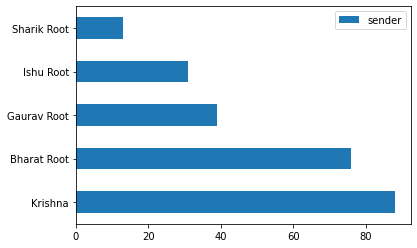

In [ ]:
#Highly Talkative
import matplotlib.pyplot as plt
%matplotlib inline
sender_with_number_of_messages = data['sender'].value_counts(ascending=False)
pd.DataFrame(sender_with_number_of_messages).plot.barh()


In [ ]:
data.head(50)

,index,datetime,sender,text_message
0,2,2021-03-24 21:35:00,Gaurav Root,Chutiya purane vle me hvadd krleta ek or nya k...
1,6,2021-03-24 21:36:00,Bharat Root,Gaurav bhai
2,7,2021-03-24 21:36:00,Bharat Root,😂
3,8,2021-03-24 21:36:00,Bharat Root,kisse mangra hai
4,9,2021-03-24 21:36:00,Gaurav Root,Ye ase h randhir kbydd arri th
5,10,2021-03-24 21:36:00,Gaurav Root,😂😂😂
6,11,2021-03-24 21:37:00,Krishna,Bawda ho gya hai
7,12,2021-03-24 21:37:00,Bharat Root,@919873098866 raat mai isko kuch jyada hi Ladk...
8,13,2021-03-24 21:37:00,Gaurav Root,Bc bawla hta h vo
9,14,2021-03-24 21:37:00,Bharat Root,kabhi isko kisi aur ki yad aari hoti hai with ...


In [ ]:
#Words Usage
## Create DataFrame with all words used split by sender
# Filter out 'Media Omitted' messages
data_texts = data[~data['text_message'].str.contains('omitted')]

# Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])

# Loop through all messages in the DataFrame
for sender, message in zip(data_texts.sender, data_texts.text_message):
 
  # Split out each word in each message
  message_split = message.split()
  for word in message_split:
 
    # Add each word to the DataFrame
    words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)

# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = ['the','to','a','i','you','it','and','for','be','that','in','of','have','on','at','is','as','or','we','if','so','']

# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]

# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head()


,words,count
0,hai,38
1,h,22
2,bhai,19
3,hi,18
4,file,16


In [ ]:
word_count_total[word_count_total['words'].isin(['train','sorry','beers','fitness','pub','quiz','happy','birthday','hockey'])]


,words,count
314,sorry,1


In [ ]:
words_filtered

,sender,words
0,Gaurav Root,chutiya
1,Gaurav Root,purane
2,Gaurav Root,vle
3,Gaurav Root,me
4,Gaurav Root,hvadd
...,...,...
1002,Bharat Root,mereko
1003,Bharat Root,bhi
1004,Bharat Root,doubt
1005,Bharat Root,hone


In [118]:
data['text_message'] = data['text_message'].apply(lambda x :"Sticker" if "(file attached)" in x else x)  

In [ ]:
data[data.sender == "Ishu Root"]


,index,datetime,sender,text_message
86,94,2021-03-24 22:15:00,Ishu Root,Ye kya ho rha h??
89,97,2021-03-24 22:18:00,Ishu Root,😂😂😂😂
92,100,2021-03-24 22:21:00,Ishu Root,Sticker
94,102,2021-03-24 22:29:00,Ishu Root,Sticker
97,105,2021-03-24 22:42:00,Ishu Root,Sticker
109,117,2021-03-25 09:43:00,Ishu Root,🤣
121,129,2021-03-25 10:44:00,Ishu Root,Panorama bhejna
122,130,2021-03-25 10:44:00,Ishu Root,Dekha nhi h mene
124,132,2021-03-25 10:45:00,Ishu Root,😂 chalenge Bhai.. Kisi aur ko Jana h abhi.. us...
130,138,2021-03-25 22:32:00,Ishu Root,Yahi hu Bhai.. abhi dinner kiya h


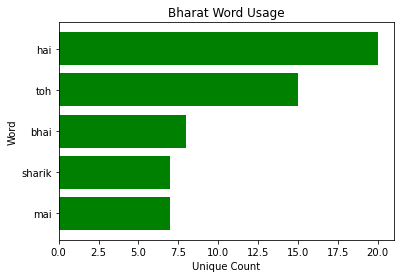

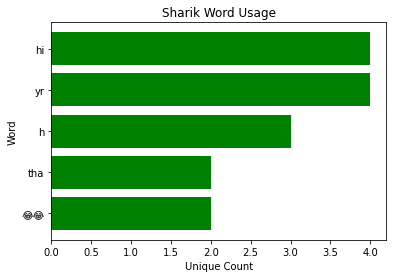

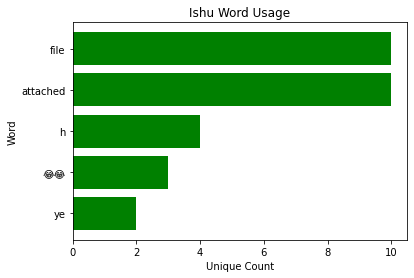

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


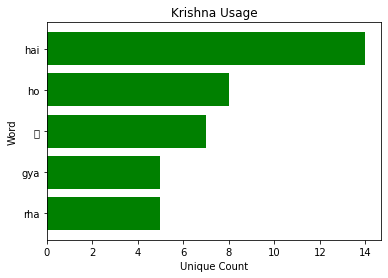

In [ ]:
# Create word counts by sender as a series
word_count_by_sender_series = words_filtered.groupby(['sender', 'words']).size().sort_values(ascending=False)

# Create word counts by sender series as a DataFrame
word_count_by_sender = pd.DataFrame(word_count_by_sender_series)

# Reset index in order to name columns correctly
word_count_by_sender = word_count_by_sender.reset_index()
word_count_by_sender.columns = ['sender', 'words', 'count']

# Plot bar chart with top n all words used by Bharat
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Bharat Root'].head(5).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Bharat Word Usage")
plt.show()

# Plot bar chart with top n all words used by Sharik
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Sharik Root'].head(5).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Sharik Word Usage")
plt.show()

# Plot bar chart with top n all words used by ishu
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Ishu Root'].head(5).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Ishu Word Usage")
plt.show()

# Plot bar chart with top n all words used by Krishna
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Krishna'].head(5).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Krishna Usage")
plt.show()


Text(0, 0.5, 'Date')

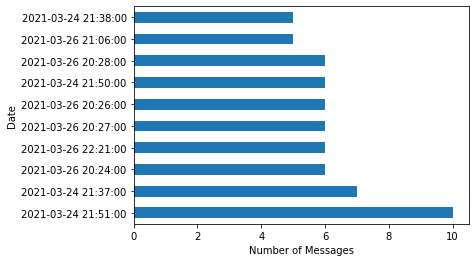

In [ ]:
# Most Active Date
data['datetime'].value_counts(ascending=False).head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [105]:
!pip install wordcloud


In [120]:
full_message = " ".join(message for message in data.text_message)

In [121]:
# WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


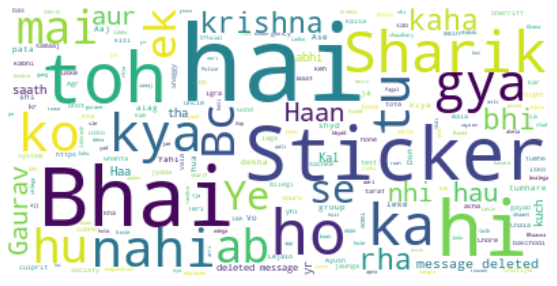

In [123]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(full_message)
# Display the generated image:
# the matplotlib way:

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()